In [12]:
import subprocess
import os
import shutil

audio_file = 'audios/aishell2/IT0016W0441.wav'

def asr(audio_file,lan=''):
    """语音识别

    Args:
        audio_file (str): 音频文件
        lan (str, optional): 识别语言. Defaults to 'en'.
    """
    
file_name = os.path.basename(audio_file)
file_name_no_ext = os.path.splitext(file_name)[0]
output_dir = f'whisper_out/{file_name_no_ext}'
subprocess.run(['mkdir','-p',output_dir])
wav_file = f'{output_dir}/{file_name}'
shutil.copyfile(audio_file,wav_file)
subprocess.run(['whisperx',os.path.abspath(wav_file)])



No language specified, language will be first be detected for each audio file (increases inference time).
Model was trained with pyannote.audio 0.0.1, yours is 2.1.1. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.0.0. Bad things might happen unless you revert torch to 1.x.


Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.0.2. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file ../../../../.cache/torch/whisperx-vad-segmentation.bin`


>>Performing transcription...
Detected language: zh (0.99) in first 30s of audio...
New language found (zh)! Previous was (en), loading new alignment model for new language...
>>Performing alignment...


CompletedProcess(args=['whisperx', '/home/ldy/data/repos/valle/docs/whisper_out/IT0016W0441/IT0016W0441.wav'], returncode=0)

## 做波形图加竖线

哈哈哈哈


/home/ldy/anaconda3/envs/whisperx/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


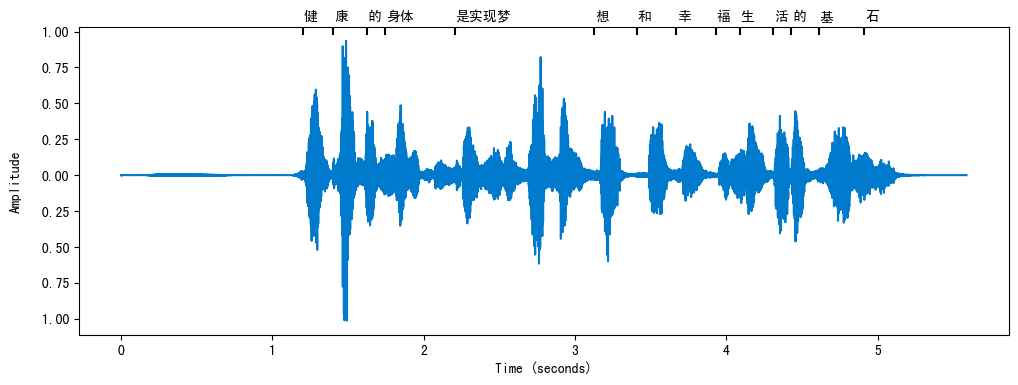

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'SimHei'

import os
import librosa
import numpy as np
from datetime import datetime
import json


def time_to_seconds(time_str):
    time_obj = datetime.strptime(time_str, "%H:%M:%S,%f")
    time_delta = time_obj - datetime.strptime("00:00:00", "%H:%M:%S")
    return time_delta.total_seconds()


def plt_wav_with_words(wav_file, title = ''):
    # load waveform
    waveform, sr = librosa.load(wav_file)
    file_name = os.path.basename(wav_file)
    file_name_no_ext = os.path.splitext(file_name)[0]
    word_segments = json.loads(open(f"{file_name_no_ext}.json").read())["word_segments"]

    # create a time variable from 0 to len(waveform)/sr
    t = np.arange(len(waveform)) / sr

    # plot waveform with timestamps
    fig, ax = plt.subplots(figsize=(12, 4))

    ax.plot(t, waveform, color="#007acc")  # use plt.plot with time variable t

    # add vertical line at each word's timestamp at the top of the plot

    ylim = ax.get_ylim()
    top = ylim[1]
    bottom = ylim[0]
    new_segs = []
    for seg in word_segments:
        if 'start' in seg:
            new_segs.append(seg)
        else:
            new_segs[-1]['word'] += seg['word']

    for seg in new_segs:
        if 'start' in seg:
            ax.plot([seg['start'], seg['start']], [top, top - 0.05], color="k")
            ax.text(seg['start'] + 0.005, ylim[1] + 0.02 * (top - bottom), seg["word"])


    # manually set the y limit to include the vertical lines
    ax.set_ylim(ylim[0], top)
    plt.title(title, loc="left")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    plt.show()
    
# plt_wav_with_words('whisper_out/anger_libritts1/anger_libritts1.wav')
# plt_wav_with_words('whisper_out/neutral_libritts1/neutral_libritts1.wav')
print("哈哈哈哈")
plt_wav_with_words('whisper_out/IT0016W0441/IT0016W0441.wav')


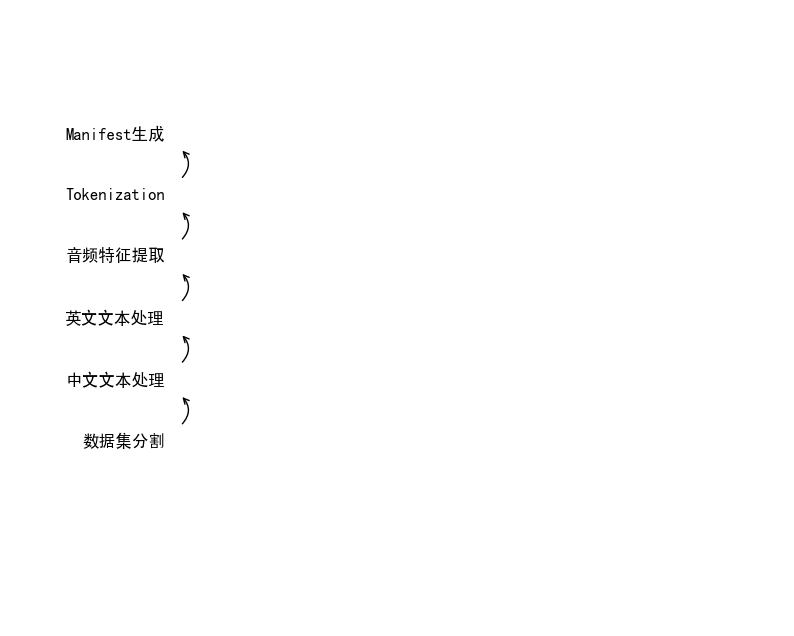

In [13]:
import matplotlib.pyplot as plt

# 创建主图
fig, ax = plt.subplots(figsize=(10, 8))

# 设置边框样式
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# 添加步骤标签
steps = ['Manifest生成', 'Tokenization', '音频特征提取', '英文文本处理', '中文文本处理', '数据集分割']
step_y = 0.8
for step in steps:
    ax.text(0.2, step_y, step, ha='right', va='center', fontsize=12)
    step_y -= 0.1

# 添加箭头连接
arrow_start = 0.775
arrow_end = 0.725
for i in range(len(steps)-1):
    ax.annotate('', xy=(0.22, arrow_start), xytext=(0.22, arrow_end),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=.5'))
    arrow_start -= 0.1
    arrow_end -= 0.1

# 调整坐标轴和标签
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_axis_off()

# 显示图形
plt.show()
